In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
import numpy as np
from pathlib import Path
import pandas as pd
from segmentflow import view
from skimage import measure

In [9]:
dic_path = Path(
    r"C:\Users\gusb\Research\mhe-analysis\data\DIC_Etz_0800_0000.plt")
    # r"C:\Users\cgusb\Research\mhe-analysis\data\DIC_Etz_0800_0000.plt")
# with open(dic_path, 'r') as f:
#     dic = f.readlines()
# dic
df = pd.read_csv(dic_path, delimiter=' ', header=None)
# Remove all ',' characters
df[1] = df[1].str.replace(',', '')
df[1] = df[1].astype(float)
df = df.drop(columns=0)
df = df.dropna().reset_index(drop=True)
df = df.rename(columns={1:'x', 2:'y', 3:'z'})
df.head()
# df[1]

,x,y,z
0,915.951405,1604.166667,0.079314
1,960.722084,1604.166667,-0.123323
2,1005.266994,1604.166667,-0.270351
3,1049.518422,1604.166667,-0.091159
4,1093.401244,1604.166667,0.043436


In [10]:
df['x'].loc[1]

960.7220843140183

In [11]:
rs_df = df.copy()
rs_df['x'] = (df['x'] - df['x'].min())
rs_df['x'] = rs_df['x'] / rs_df['x'].loc[1]
rs_df['y'] = df['y'] - df['y'].min()
rs_df[:14]

,x,y,z
0,0.000000,0.000000,0.079314
1,1.000000,0.000000,-0.123323
2,1.994957,0.000000,-0.270351
3,2.983359,0.000000,-0.091159
4,3.963528,0.000000,0.043436
5,4.933568,0.000000,0.064904
6,5.891304,0.000000,0.084273
7,6.834194,0.000000,0.230669
8,7.759232,0.000000,0.075180
9,8.662802,0.000000,-0.006713


In [64]:
width = 12
height = 12
thresh = -0.1
x_res = df['x'].loc[1] - df['x'].loc[0]
print(f'{x_res=}')
y_res = df['y'].loc[width] - df['y'].loc[0]
print(f'{y_res=}')
img = np.zeros((height, width))
i = 0
for x in range(width):
    for y in range(height):
        img[y, x] = df['z'].loc[i]
        i += 1
print(f'{img.shape=}')
print(f'{img.min()=}')
print(f'{img.max()=}')

x_res=44.770679188427835
y_res=208.33333333333326
img.shape=(12, 12)
img.min()=-0.2755518856288532
img.max()=0.2306688938251246


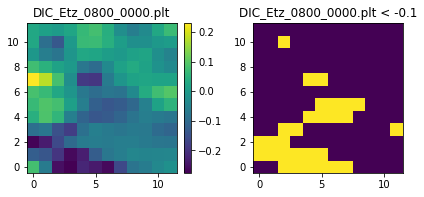

In [49]:
fig, axes = plt.subplots(1, 2, tight_layout=True)
ax = axes.ravel()
# pos = ax.imshow(img)
pos = ax[0].imshow(img, origin='lower')
ax[0].set_title(dic_path.name)
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
# fig.colorbar(pos, ax=ax[0])
fig.colorbar(pos, cax=cax)
ax[1].imshow(img < thresh, origin='lower')
ax[1].set_title(f'{dic_path.name} < {thresh}')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
cax.set_axis_off()

Documentation for `skimage.measure.regionprops` located [here](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops)

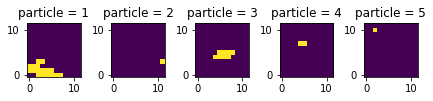

In [66]:
img_bw = img < thresh
img_labeled = measure.label(img_bw, connectivity=1)
regions = measure.regionprops(img_labeled, spacing=(y_res, x_res))

max_plot_cols = 3
plot_rows = int(math.ceil(len(regions) / max_plot_cols))
fig, axes = plt.subplots(1, len(regions), tight_layout=True)
ax = axes.ravel()
for i in range(1, len(regions)+1):
    ax[i-1].imshow(img_labeled==i, origin='lower')
    ax[i-1].set_title(f'particle = {i}')

In [56]:
for region in regions:
    print(f'particle = {region.label}')
    print('  area:', region.area)
    print('  centroid:', region.centroid)
    print('  eccentricity:', region.eccentricity)
    print('  equiv. diameter:', region.equivalent_diameter_area)
    print('  feret diameter max:', region.feret_diameter_max)

particle = 1
  area: 158562.82212568185
  centroid: (220.5882352941176, 131.6784682012583)
  eccentricity: 0.9391129323338053
  equiv. diameter: 449.3199922719061
  feret diameter max: 875.5588719122185
particle = 2
  area: 9327.224830922461
  centroid: (624.9999999999998, 492.4774710727062)
  eccentricity: 0
  equiv. diameter: 108.97610516698705
  feret diameter max: 208.33333333333326
particle = 3
  area: 74617.79864737969
  centroid: (937.4999999999997, 268.624075130567)
  eccentricity: 0.8911378416763951
  equiv. diameter: 308.2309718034996
  feret diameter max: 453.52147749693285
particle = 4
  area: 18654.449661844923
  centroid: (1458.3333333333328, 201.46805634792526)
  eccentricity: 1.0
  equiv. diameter: 154.1154859017498
  feret diameter max: 213.08963253234745
particle = 5
  area: 9327.224830922461
  centroid: (2083.3333333333326, 89.54135837685567)
  eccentricity: 0
  equiv. diameter: 108.97610516698705
  feret diameter max: 208.33333333333326


In [52]:
2*x_res * 1*y_res

18654.449661844923